[github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm), mar 2016

<center>
<img width=300 src="./fig/ladisk.png">
<br>
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
<br><br><br>

<font size="10" color="f00e0e" face="garamond"><b>Numerično odvajanje</b></font>

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
init_printing()

# 1. Uvod

V okviru tega poglavja se želimo seznaniti s tem kako funkcijo $f(x)$ numerično odvajati, torej pridobiti rezultati: $f'(x)$, $f''(x)$,... 

Pri tam se imamo dva v principu različna pristopa:
1. odvajanje glede na numerične vrednosti funkcije $f(x)$ pri različnih vrednostih $x$ in
* najprej izvedemo interpolacijo ali aproksimacijo, nato pa na podlagi znanih interpolacijskih ali aproksimacijskih funkcij izračunamo odvod.

Drugega pristopa si tukaj ne bomo podrobneje pogledali, saj smo o tej temi že govorili pri interpolaciji oz aproksimaciji). 

Če se torej osredotočimo na prvi pristop, odvajanje temelji na vrednostih funkcije pri različnih vrednostih $x$. Poglejmo si definicijo odvoda:
$$f'(x)=\lim_{\Delta x \rightarrow 0}\frac{f(x+\Delta x)-f(x)}{\Delta x},$$
ker je $\Delta x$ v primeru numeričnih vrednosti končno velik, vendar vseeno zelo majhne, to pomeni, da v števcu odštevamo vrednosti funkcije, ki se  malo razlikujeta; poleg tega pa v imenovalcu delimo z majhno vrednostjo $\Delta x$. Obojo povečuje negotovost / napako numeričnega odvoda. Iz rega razloga se numeričnemu odvajanju **izogibamo**, je pa numerično odvajanje v obliki t.i. metode **končnih razlik** zelo pomembno pri reševanju **diferencialnih enačb** (kakor si bomo pogledali v okviru predavanj na temo numeričnega reševanja diferencialnih enačb, se pri metodi končnih razlik osredotočimo na vrednosti funkcije $f$ in ne njenih odvod; to pomeni, da je negotovost manjša).

# 2. Aproksimacija odvoda z metodo končnih razlik

Odvod $f'(x)$ lahko aproksimiramo na podlagi razvoja Taylorje vrste. Tej metodi rečemo **metoda končnih razlik** ali tudi **diferenčna metoda**.

Definirajmo najprej simbole:

In [2]:
f, x, h = symbols('f, x, h')
# opomba: spodnje izvajanje v verziji sympy 0.7.5 lahko ne da pravega rezultat,
# posodobite na zadnjo verzijo 0.7.6; uporabite ukaz
!pip install -U sympy

Requirement already up-to-date: sympy in c:\anaconda3\lib\site-packages


Nato nadaljujemo z razvojem **Taylorjeve vrste naprej** (ang. *forward Taylor series*):

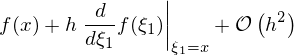

In [3]:
f(x+h).series(h, n=2)

Pri tem so simboli prikazani na sliki:
<img src='./fig/koncne_razlike.png' width=300>

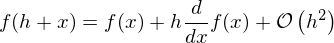

In [4]:
func = f(x+h)
Eq(func, func.series(h, n=2).doit())

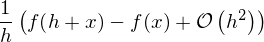

In [5]:
f1 = solve(
      Eq(func, func.series(h, n=2).doit()#.removeO()
        ),
      f(x).diff(x)
      )[0]
f1

Primer: $\exp(-x)$

In [6]:
fp = exp(-x)

In [7]:
fp.diff(x).evalf(subs={x: 1})

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


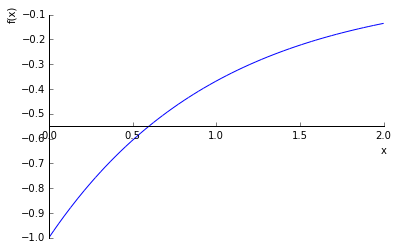

In [8]:
dfp = fp.diff(x)
plot(dfp, (x, 0, 2));

Približek odvoda

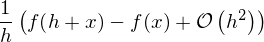

In [9]:
f1

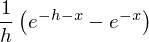

In [10]:
f1_priblizek = (fp.subs(x, x+h)-fp)/h
f1_priblizek

In [11]:
f1_priblizek.subs(x, 1).subs(h, .001).evalf()

### Nadaljujemo s teorijo

Nadaljujemo s teorijo. Taylorjeva vrsta naprej:

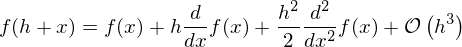

In [12]:
func = f(x+h)
Eq(func, func.series(h, n=3).doit())

Pripravimo še razvojem **Taylorjeve vrste nazaj** (ang. *backward Taylor series*):

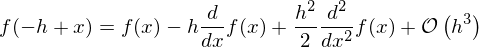

In [13]:
func = f(x-h)
Eq(func, func.series(h, n=3).doit())

# 3. Centralna diferenčna shema

### Prvi odvod $f'(x)$

Če Taylorjevo vrsto nazaj odštejemo od vrste naprej, se sodi odvodi odštejejo:

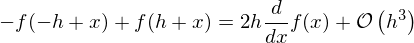

In [14]:
razlika = f(x+h) - f(x-h)
eq = Eq(razlika, razlika.series(h, n=3).doit())
eq

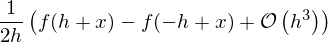

In [15]:
solve(eq, f(x).diff(x))[0]

Zanemarimo višje odvode ($\mathcal{O}(h^{3})$) in rešimo za $f'(x)$:

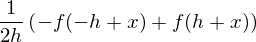

In [16]:
f1 = solve(
           Eq(razlika, razlika.series(h, n=3).doit().removeO()),
           f(x).diff(x)
          )[0]#.expand()
f1

#### Primer uporabe

In [17]:
fp

In [18]:
dfp

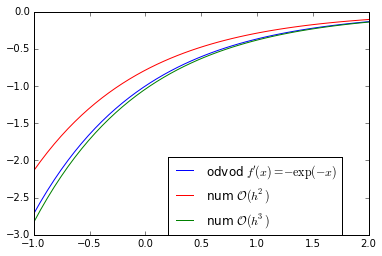

In [19]:
hh = 0.5
xx = np.linspace(-1, 2, 50)
num_od_O2 = (np.exp(-(xx+hh)) - np.exp(-xx))/(hh)
num_od_O3 = (np.exp(-(xx+hh)) - np.exp(-(xx-hh)))/(2*hh)
plt.plot(xx, -np.exp(-xx), label='odvod $f\'(x)=-\exp(-x)$');
plt.plot(xx, num_od_O2, 'r', label='num $\mathcal{O}(h^{2})$');
plt.plot(xx, num_od_O3, 'g', label='num $\mathcal{O}(h^{3})$');
plt.legend(loc=(.4, 0));

### Drugi odvod $f''(x)$

Če Taylorjevo vrsto naprej in nazaj seštejemo, se odštejejo lihi odvodi:

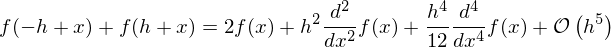

In [20]:
vsota = f(x+h) + f(x-h)
Eq(vsota, vsota.series(h, n=5).doit())

Ponovno zanemarimo višje odvode ($\mathcal{O}(h^{3})$) in izpostavimo drugi odvod:

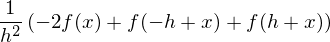

In [21]:
f2 = solve(
           Eq(vsota, vsota.series(h, n=4).doit().removeO()),
           f(x).diff(x,2)
           )[0]
f2

### Tretji odvod $f'''(x)$

Ponovimo izvajanje za prvi odvod $f'(x)$, vendar sedaj zanemarimo $\mathcal{O}(h^{4})$:

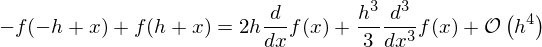

In [22]:
Eq(razlika, razlika.series(h, n=4).doit())

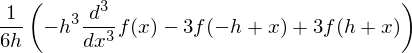

In [23]:
f1_O4 = solve(
              Eq(razlika, razlika.series(h, n=5).doit().removeO()),
              f(x).diff(x)
             )[0]
f1_O4

Da bi izračunali $f'''(x)$ potrebujemo torej še eno enačbo; pridobimo jo tako, da za isto lego $x$ izračunamo $f'(x)$ z dvojnim korakom $2h$. Podobno kakor zgoraj torej zapišemo:

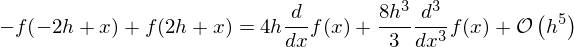

In [24]:
razlika2h = f(x+2*h) - f(x-2*h)
Eq(razlika2h, razlika2h.series(h, n=5).doit())

Prvi odvod $f'(x)$ izračunan z dvojnim korakom $2h$ torej je:

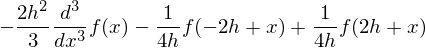

In [25]:
f1_O4_2h = solve(
                Eq(razlika2h, razlika2h.series(h, n=5).doit().removeO()),
                f(x).diff(x)
                )[0].expand()
f1_O4_2h

Izenačimo izraza za prvi odvod $f'(x)$ z enojnim in dvojnim korakom:

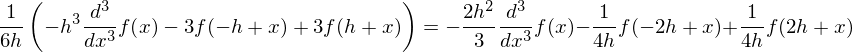

In [26]:
Eq(f1_O4, f1_O4_2h)

Enačbo lahko rešimo za definiranje tretjega odvoda $f'''(x)$:

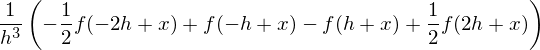

In [27]:
f3 = solve(
           Eq(f1_O4, f1_O4_2h),
           f(x).diff(x,3)
          )[0]#.expand()
f3

### Četrti odvod $f^{(4)}(x)$

Podobno kakor za tretji odvod izvedemo za četrti odvod (vendar seštevamo Taylorjevo vrsto naprej in nazaj):

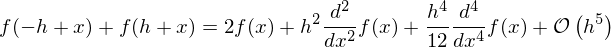

In [28]:
Eq(vsota, vsota.series(h, n=5).doit())

Določimo torej drugi odvod:

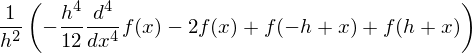

In [29]:
f2_O5 = solve(
              Eq(vsota, vsota.series(h, n=6).doit().removeO()),
              f(x).diff(x,2)
             )[0]#.expand()
f2_O5

Podobno določimo drugi odvod $f''(x)$ iz seštevanja Taylorjeve vrste naprej in nazaj za dvojni korak $2h$:

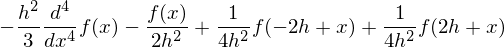

In [30]:
vsota2h = f(x+2*h) + f(x-2*h)
f2_O5_2h = solve(
                Eq(vsota2h, vsota2h.series(h, n=6).doit().removeO()),
                f(x).diff(x,2)
                )[0].expand()
f2_O5_2h

In končno rešimo četrti odvod:

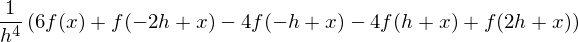

In [31]:
f4 = solve(
           Eq(f2_O5, f2_O5_2h),
           f(x).diff(x,4)
          )[0]#.expand()
f4

### Povzetek centralne diferenčne sheme

Zgoraj smo izpeljali prve štiri odvode:

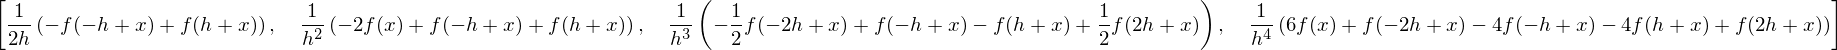

In [32]:
odvodi = [f1, f2, f3, f4]
odvodi

In [33]:
diskretne_tocke = [f(x-2*h), f(x-h), f(x), f(x+h), f(x+2*h)]

Poglejmo si spodnji primer:

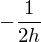

In [34]:
f1.expand().coeff(diskretne_tocke[1])

in ga posplošimo:

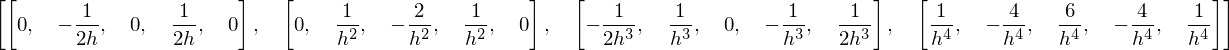

In [35]:
centralna_diff_shema = [[odvod.expand().coeff(ds) for ds in diskretne_tocke] for odvod in odvodi]
centralna_diff_shema

Zgornje povzetke lahko tudi zapišemo v tabelarični obliki:

|       |$\mbox{$f(x-2h)$}$|$\mbox{$f(x-h)$}$ |$\mbox{$\quad f(x)\quad$}$   |$\mbox{$f(x+h)$}$ |$\mbox{$f(x+2h)$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{2h}\cdot$}$| 0     | -1 | 0 | 1 | 0|
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 0 | 1 | -2 | 1 | 0|
|$\mbox{$f'''(x)=\frac{1}{2h^3}\cdot$}$| -1 | 2 | 0 | -2 | 1|
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 1 | -4 | 6 | -4 | 1|

Centralna diferenčna shema ima napako drugega reda $\mathcal{O}(h^{2})$.

### Povečevanje reda napake

Natančnost lahko teoretično poljubno povečujemo; vse kar moramo narediti je, da Taylorjevo vrsto razvijemo do višjega reda. Poglejmo si izpeljavo za prvi odvod $f'(x)$.

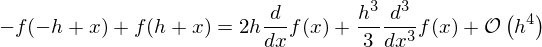

In [36]:
N=4
Eq(razlika, razlika.series(h, n=N).doit())

Določimo sedaj tretji odvod:

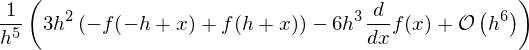

In [37]:
f3_O4 = solve(
              Eq(razlika, razlika.series(h, n=N).doit()),
              f(x).diff(x,3)
             )[0]
f3_O4

Nadaljujemo razvojem razlike pri koraku $2h$:

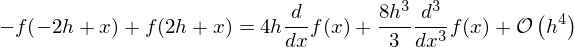

In [38]:
Eq(razlika2h, razlika2h.series(h, n=N).doit())

in vstavimo predhodno določeni tretji odvod: 

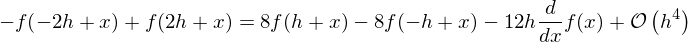

In [39]:
eq = Eq(razlika2h, razlika2h.series(h, n=N).doit().removeO()).subs(f(x).diff(x,3), f3_O4).expand()
eq

Določimo torej prvi odvod z redom napake $\mathcal{O}(h^{4})$:

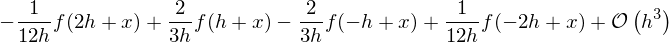

In [40]:
f1_O4 = solve(
              eq,
              f(x).diff(x)
             )[0].expand()
f1_O4

Zapišemo v urejeno obliko:

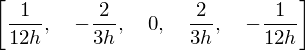

In [41]:
[f1_O4.coeff(ds) for ds in diskretne_tocke]

#### Uporaba ``scipy.misc.central_diff_weight`` za izračun koeficientov

In [42]:
from scipy.misc import central_diff_weights

Prvi odvod (čez tri točke) napake reda  $\mathcal{O}(h^{2})$

In [43]:
central_diff_weights(Np=3, ndiv=1)

array([-0.5,  0. ,  0.5])

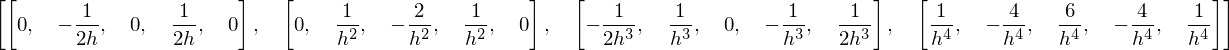

In [44]:
centralna_diff_shema

Drugi odvod (čez tri točke) napake reda  $\mathcal{O}(h^{2})$

In [45]:
central_diff_weights(Np=3, ndiv=2)

array([ 1., -2.,  1.])

Tretji odvod (čez pet točk) napake reda  $\mathcal{O}(h^{2})$

In [46]:
central_diff_weights(Np=5, ndiv=3)

array([ -5.00000000e-01,   1.00000000e+00,   4.16333634e-17,
        -1.00000000e+00,   5.00000000e-01])

Četrti odvod (čez pet točk) napake reda  $\mathcal{O}(h^{2})$

In [47]:
central_diff_weights(Np=5, ndiv=4)

array([ 1., -4.,  6., -4.,  1.])

Prvi odvod (čez pet točk) napake reda  $\mathcal{O}(h^{3})$

In [48]:
central_diff_weights(Np=5, ndiv=1)

array([  8.33333333e-02,  -6.66666667e-01,  -2.77555756e-17,
         6.66666667e-01,  -8.33333333e-02])

#### Uporaba ``SymPy.as_finite_diff``

Za pomoč pri končnih razlikah se lahko obrnemu tudi na ``SymPy`` funkcije:
* `as_finite_diff`
* `finite_diff_weights`
* `apply_finite_diff`

Tukaj si bomo pogledali prvo, ki nam omogoča izračun končnih razlik pri poljubnih vozliščih (korak ni nujno konstanten):

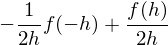

In [79]:
as_finite_diff(f(x).diff(x), [-h, h])

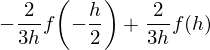

In [82]:
as_finite_diff(f(x).diff(x), [-h/2, h])

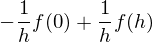

In [86]:
as_finite_diff(f(x).diff(x), [0, h])

# 4. Necentralna diferenčna metoda

Centralna diferenčna shema, ki smo jo spoznali zgoraj je zelo uporabna in relativno natančna; ker pa je ne moremo vedno uporabiti (recimo na robu ali na začetku), si moramo pomagati z **necentralnimi diferenčnimi shemami**. Poznamo:
* **diferenčno shemo naprej**, ki odvod točke aproksimira z vrednostmi v sledečih točkah in 
* **diferenčno shemo nazaj**, ki odvod točke aproksimira z vrednostmi v predhodnih točkah.

Poglejmo si tukaj izpeljavo prvega odvoda $f'(x)$ z diferenčno shemo naprej. Najprej razvijemo Taylorjevo vrsto:

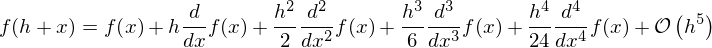

In [49]:
naprej = f(x+h)
Eq(naprej, naprej.series(h, n=5).doit())

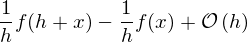

In [50]:
f1_F = solve(
             Eq(naprej, naprej.series(h, n=2).doit()), 
             f(x).diff(x))[0].expand()
f1_F

Opazimo, da imamo z zanemaritvijo drugega in višjih odvodov relativno velik red napake  $\mathcal{O}(h^{1})$. Seveda lahko z vključitvijo več členov zmanjšamo red napake. Tukaj bolj podrobno v izpeljevanje ne bomo šli; bomo si pa v nadaljevanju pogledali diferenčno shemo naprej/nazaj z redom napake  $\mathcal{O}(h^{1})$ in  $\mathcal{O}(h^{2})$.

### Diferenčna shema naprej

Diferenčna shema za red napake $\mathcal{O}(h^{1})$:

|       |$\mbox{$\quad f(x)\quad$}$|$\mbox{$f(x+h)$}$ |$\mbox{$f(x+2h)$}$   |$\mbox{$f(x+3h)$}$ |$\mbox{$f(x+4h)$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{h}\cdot$}$| -1     | 1 | 0 | 0 | 0|
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 1 | -2 | 1 | 0 | 0|
|$\mbox{$f'''(x)=\frac{1}{h^3}\cdot$}$| -1 | 3 | -3| 1 | 0|
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 1 | -4 | 6 | -4 | 1|

Diferenčna shema za red napake $\mathcal{O}(h^{2})$:

|       |$\mbox{$\quad f(x)\quad$}$|$\mbox{$f(x+h)$}$ |$\mbox{$f(x+2h)$}$   |$\mbox{$f(x+3h)$}$ |$\mbox{$f(x+4h)$}$|$\mbox{$f(x+5h)$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{2h}\cdot$}$| -3 | 4 | -1| 0 | 0|  0| 
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 2 | -5 | 4 | -1| 0| 0| 
|$\mbox{$f'''(x)=\frac{1}{2h^3}\cdot$}$| -5 | 18| -24| 14| -3| 0| 
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 3 | -14 | 26 | -24 | 11| -2| 

### Diferenčna shema nazaj

Diferenčna shema za red napake $\mathcal{O}(h^{1})$:

|       |$\mbox{$f(x-4h)$}$|$\mbox{$f(x-3h)$}$ |$\mbox{$f(x-2h)$}$   |$\mbox{$f(x-h)$}$ |$\mbox{$\quad f(x)\quad$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{h}\cdot$}$| 0 | 0| 0 | -1| 1|
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 0 | 0 | 1 | -2| 1|
|$\mbox{$f'''(x)=\frac{1}{h^3}\cdot$}$| 0 | -1| 3| -3| 1|
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 1 | -4 | 6 | -4 | 1|

Diferenčna shema za red napake $\mathcal{O}(h^{2})$:

|       |$\mbox{$f(x-5h)$}$|$\mbox{$f(x-4h)$}$ |$\mbox{$f(x-3h)$}$   |$\mbox{$f(x-2h)$}$ |$\mbox{$f(x-h)$}$|$\mbox{$\quad f(x)\quad$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{2h}\cdot$}$| 0 | 0| 0| 1 |-4| 3| 
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 0 | 0 | -1| 4|-5| 2| 
|$\mbox{$f'''(x)=\frac{1}{2h^3}\cdot$}$| 0 | 3| -14| 24|-18| 5| 
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| -2| 11| -24| 26 | -14| 3| 

## Uporaba ``numpy.gradient``

Za izračun numeričnih odvodov lahko uporabimo tudi ``numpy.gradient``, ki sprejme seznam poljubne dimenzije in izračuna odvod s pomočjo centralne diferenčne sheme za osrednje točke, za točke na robu pa diferenčno shemo naprej ali nazaj (prvega ali drugega reda). Za podrobnosti glejte dokumentacijo: [docs.scipy.org](http://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html).

# 5. Numerična napaka pri metodi končnih razlik

Kot ime samo pove, metoda končnih razlik temelji na *končnih razlikah* $h$ in v kolikor je ta razlika $h$ relativno majhna, je sicer teoretično odvod v točki $x$ bolj natačno definiran, vendar pa zaradi omejene natančnosti razlika med vrednostmi funkcije $f(x)$ in $f(x+h)$ postane relativno majhna. Relativno napako razumemo glede na natančnost zapisa števila znotraj spomina. 

Spodaj si bomo pogledali primer, kjer bomo natančnost spreminjali v treh korakih:
1. ``float16`` -
    16 bitni zapis: predzank 1 bit, 5 bitov eksponent, 10 bitov mantisa
* ``float32`` -
    32 bitni zapis: predzank 1 bit, 8 bitov eksponent, 23 bitov mantisa
* ``float64`` -
    64 bitni zapis: predzank 1 bit, 11 bitov eksponent, 52 bitov mantisa (to je privzeta natančnost).

Več o tipih v ``numpy``: http://docs.scipy.org/doc/numpy/user/basics.types.html

### Preprosti primer

Definirajmo najprej funkcijo, ki bo dala rezultat željene natančnosti:

In [51]:
def fun(x, dtype=float):
    return np.exp(-x).astype(dtype)

In [52]:
fun(1, dtype='float16')

0.36792

In [53]:
fun(1.0002, dtype='float16')

0.36792

Nato še prvi odvod s centralno diferenčno shemo (željene natančnosti)

In [54]:
def f1_MKE(fun, x, h, dtype=float):
    xf, hf = np.asarray((x, h)).astype(dtype=dtype)
    return (fun(xf+hf, dtype=dtype)-fun(xf-hf,dtype=dtype))/(2*hf)

In [55]:
f1_MKE(fun, 1, h=.01, dtype='float16')

In [56]:
f1_MKE(fun, 1, h=.01, dtype='float64')

Definirajmo sedaj korak:

In [57]:
h=0.25**np.arange(30)
h

array([  1.00000000e+00,   2.50000000e-01,   6.25000000e-02,
         1.56250000e-02,   3.90625000e-03,   9.76562500e-04,
         2.44140625e-04,   6.10351562e-05,   1.52587891e-05,
         3.81469727e-06,   9.53674316e-07,   2.38418579e-07,
         5.96046448e-08,   1.49011612e-08,   3.72529030e-09,
         9.31322575e-10,   2.32830644e-10,   5.82076609e-11,
         1.45519152e-11,   3.63797881e-12,   9.09494702e-13,
         2.27373675e-13,   5.68434189e-14,   1.42108547e-14,
         3.55271368e-15,   8.88178420e-16,   2.22044605e-16,
         5.55111512e-17,   1.38777878e-17,   3.46944695e-18])

In izrišemo različne tipe v odvisnosti od velikosti koraka $h$:

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


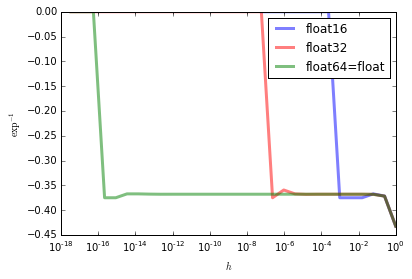

In [58]:
plt.semilogx(h,[f1_MKE(fun, 1., _, dtype='float16') for _ in h], 'b', lw=3, alpha=0.5, label='float16')
plt.semilogx(h,[f1_MKE(fun, 1., _, dtype='float32') for _ in h], 'r', lw=3, alpha=0.5, label='float32')
plt.semilogx(h,[f1_MKE(fun, 1., _, dtype='float64') for _ in h], 'g', lw=3, alpha=0.5, label='float64=float')
plt.xlabel('$h$')
plt.ylabel('$\exp^{-1}$')
plt.legend();

Opazimo, da vsi tipi najprej konvergirajo k pravi vrednosti ($\exp^{-1}=0.367879441171$), vendar pa potem z zmanjševanjem koraka ``float16`` zelo hitro divergira. Bistveno pozneje divergira ``float32`` in na koncu tudi ``float64``.

# Do naslednjih vaj preštudirajte sledeče:

1. Za batni mehanizem na spodnji sliki strojno izpeljite kinematiko gibanja bata, če se kolenasta gred giblje po zakonu $\varphi(t)=\omega\,t$.
<img src='./fig/batni mehanizem.png' width=300>
* Za kotno hitrosti $\omega=2\,\pi\,50\,$rad/s izrišite lego bata v treh obratih gredi. Uporabite: $r=0.03\,$m in $l=0.1\,$m.
* Simbolno odvajanje lege $x(t)$, da pridobite pospešek $\ddot x(t)$.
* Priprava funkcij za klicanje simbolnih izrazov za lego $x(t)$ in pospešek $\ddot x(t)$ iz ``numpy``
* S pomočjo ``scipy`` pripravite centralno diferenčno shemo za drugi odvod čez 3, 5, in 7 točk.
* Raziščite funkcijo ``numpy.convolve`` in z njo na podlagi numeričnih vrednosti za $x$ numerično izračunajte pospešek $\ddot x$. Kje je odvod pravilen?
* S centralno diferenčno shemo drugega odvoda čez tri točke ste izračunali notranje točke, nastavite diferenčno shemo naprej za izračun prve točke z natančnostjo $\mathcal{O}(h^{2})$.
* Dodajte podatkom lege določeno mero šuma in preverite zakaj ni primerna uporaba numeričnega odvajanja na šumnih podatkih.
* Z centralno diferenčno shemo drugega odvoda čez tri točke ste doslej izračunali notranje točke, nastavite diferenčno shemo nazaj za izračun zadnje točke z natančnostjo $\mathcal{O}(h^{2})$.
* Raziščite vpliv časovnega koraka na izračun drugega odvoda.
* Izmerjene imamo sledeče pozicija (gibanja) avtomobila:

    $t = [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]$ [h]

    $s = [0, 3, 10, 13, 17, 25, 33, 46, 58, 75]$ [km]

    Izračunajte hitrost in pospešek avtomobila pri času 0,5h. Hitrost in pospešek prikažite tudi v grafični obliki.

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 10 - polovica.ipynb).

## Ekstra

Dodatek k domačim nalogam: 6. vprašanje bi lahko nadaljevali in zašumljene podatke gladili in nato izvedli odvajanje. Glajenje tukaj izvedite s konvolucijo med [0.21194156,  0.57611688,  0.21194156] in $x$.

[Video predavanja na temo numeričnega odvajanja](https://www.youtube.com/watch?v=ZJkGI5DZQv8&list=PLYdroRCLMg5OvLx1EtY1ByvveJeTEXQd_&index=18)